In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from keras.layers.core import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.models import load_model
from keras.utils import np_utils
from keras.datasets import mnist
from keras.callbacks import EarlyStopping
import numpy as np

Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = np.array(X_train, dtype = np.float32)
X_test = np.array(X_test, dtype = np.float32)
X_train = X_train.reshape(60000, 28,28,1)
X_test = X_test.reshape(10000, 28,28,1)
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

11493376/11490434 [==============================] - 12s 1us/step


In [3]:
#Using ConvNets
convmodel = Sequential()
convmodel.add(Conv2D(filters=32, padding = "same", kernel_size = (5,5), activation = "relu", input_shape = (28,28,1)))
convmodel.add(Conv2D(filters=32, padding = "same", kernel_size = (5,5), activation = "relu"))
convmodel.add(MaxPooling2D(pool_size=(2,2)))
convmodel.add(Flatten())
convmodel.add(Dense(10, activation = "softmax"))
convmodel.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics=["accuracy"])
convhist = convmodel.fit(X_train, y_train, batch_size=128, epochs=10, verbose = 1, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 600s 10ms/step - loss: 2.5649 - acc: 0.8119 - val_loss: 0.0627 - val_acc: 0.9811
Epoch 2/10
60000/60000 [==============================] - 621s 10ms/step - loss: 0.0575 - acc: 0.9825 - val_loss: 0.0513 - val_acc: 0.9829
Epoch 3/10
60000/60000 [==============================] - 521s 9ms/step - loss: 0.0377 - acc: 0.9887 - val_loss: 0.0518 - val_acc: 0.9831
Epoch 4/10
60000/60000 [==============================] - 662s 11ms/step - loss: 0.0299 - acc: 0.9901 - val_loss: 0.0563 - val_acc: 0.9846
Epoch 5/10
60000/60000 [==============================] - 555s 9ms/step - loss: 0.0274 - acc: 0.9911 - val_loss: 0.0539 - val_acc: 0.9840
Epoch 6/10
60000/60000 [==============================] - 606s 10ms/step - loss: 0.0239 - acc: 0.9923 - val_loss: 0.0926 - val_acc: 0.9773
Epoch 7/10
60000/60000 [==============================] - 542s 9ms/step - loss: 0.0268 - acc: 0.9919 - val_loss: 0.058

In [4]:
score = convmodel.evaluate(X_test, y_test,verbose=0)
score

[0.09261181277320042, 0.9837]

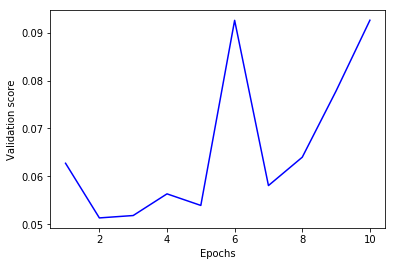

In [6]:
plt.plot(range(1, len(convhist.history["val_loss"])+1), convhist.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()

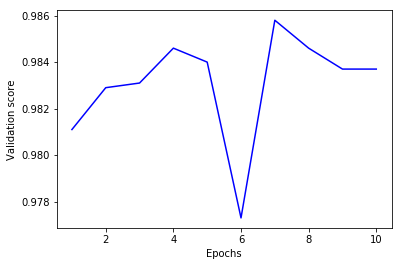

In [8]:
plt.plot(range(1, len(convhist.history["val_acc"])+1), convhist.history['val_acc'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()

In [9]:
convmodel.save("SimpleConvModel.h5")